In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

plt.rcParams["axes.unicode_minus"] = False
rc("font", family = "Arial Unicode MS")
%matplotlib inline : 실행을 했을 때 그래프가 바로 나타나게 하는 옵션
get_ipython().run_line_magic("matplotlib","inline")

import warnings
warnings.filterwarning("ignore")

UsageError: unrecognized arguments: : 실행을 했을 때 그래프가 바로 나타나게 하는 옵션


In [248]:
train = pd.read_csv('FIFA_train.csv')
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [249]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


FIFA_train.csv / FIFA_test.csv
 id : 선수 고유의 아이디
 
 name : 이름(object)
 
 age : 나이
 
 continent : 선수들의 국적이 포함되어 있는 대륙입니다(object)
 
 contract_until : 선수의 계약기간이 언제까지인지 나타내어 줍니다(object)
 
 position : 선수가 선호하는 포지션입니다. ex) 공격수, 수비수 등(object)
 
 prefer_foot : 선수가 선호하는 발입니다. ex) 오른발(object)
 
 reputation : 선수가 유명한 정도입니다. ex) 높은 수치일 수록 유명한 선수
 
 stat_overall : 선수의 현재 능력치 입니다.
 
 stat_potential : 선수가 경험 및 노력을 통해 발전할 수 있는 정도입니다.
 
 stat_skill_moves : 선수의 개인기 능력치 입니다.
 
 value : FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로) 입니다
 


In [250]:
print("이 데이터는 축구선수 {:d}명의 데이터이며 null값은 존재하지 않는다".format(len(train['id'])))
print("object형 변수는 {:d}개이며, 숫자형 변수는 {:d}개이다.".format(len(train.dtypes=="object"), len(train.dtypes=="int64")+len(train.dtypes=="float64")))

이 데이터는 축구선수 8932명의 데이터이며 null값은 존재하지 않는다
object형 변수는 12개이며, 숫자형 변수는 24개이다.


In [251]:
numtype=["int64","float64"]
numCol=[]
for col, x in zip(train.dtypes.index, train.dtypes):
    if x in numtype:
        numCol.append(col)
numCol

['id',
 'age',
 'reputation',
 'stat_overall',
 'stat_potential',
 'stat_skill_moves',
 'value']

In [252]:
numCol.remove('id')

In [253]:
def novarplot(var):
    plt.boxplot(train[var], sym="bo")
    plt.title("Boxplot   " + var)
    plt.xlabel(var)
    plt.show()

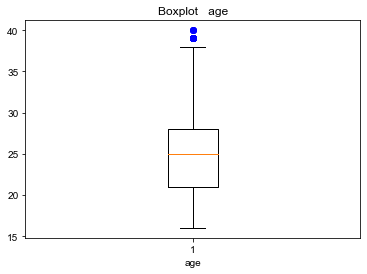

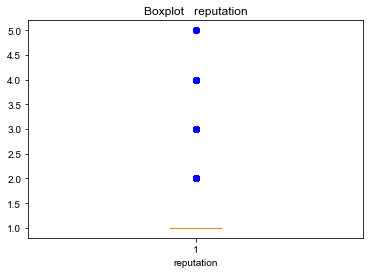

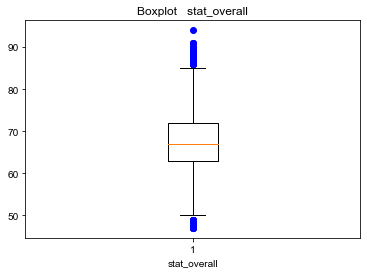

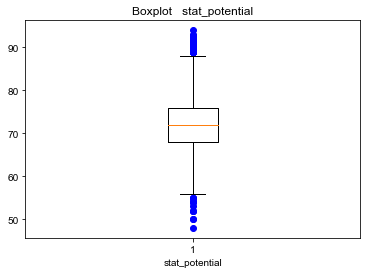

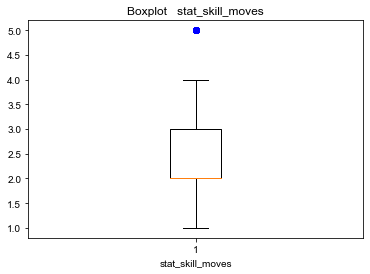

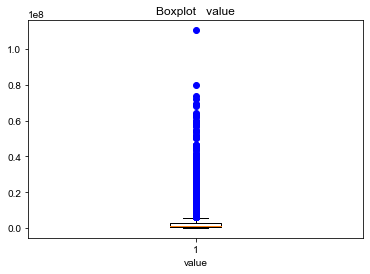

In [254]:
for x in numCol:
    novarplot(x)

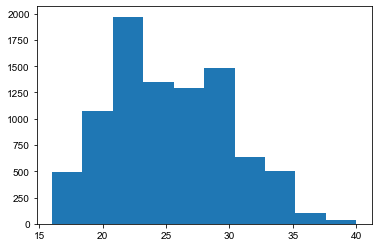

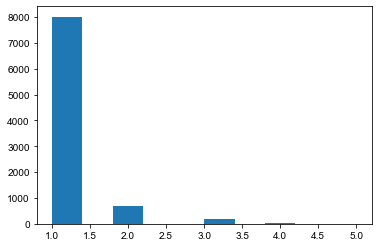

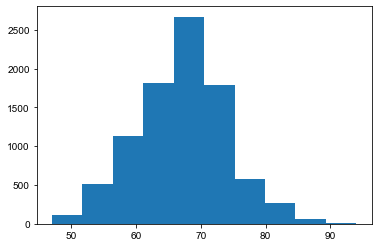

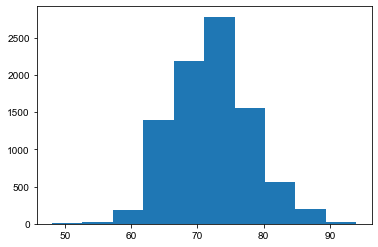

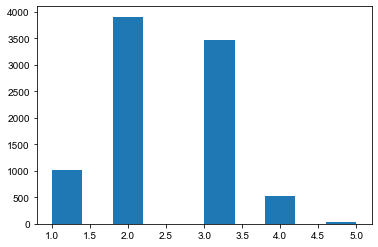

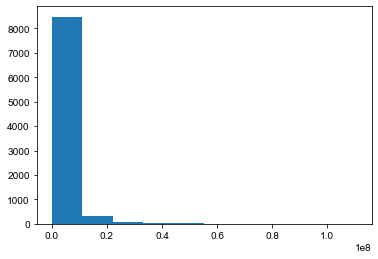

In [255]:
for x in numCol:
    plt.hist(train[x])
    plt.show()

In [ ]:
#value 변환
1) 2018년 환율 기준으로 won으로 바꿈


/Users/luchia/Desktop/python/miniconda3/envs/ds_study/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='value_won', ylabel='Density'>

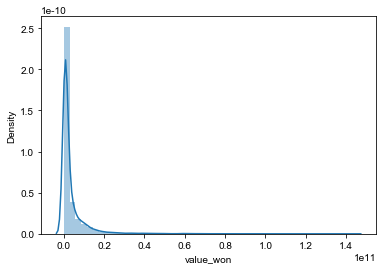

In [256]:
train['value_won'] = train['value'].apply(lambda x: x*1299.65).astype(np.int64)
sns.distplot(train['value_won'])

In [ ]:
# 편향 처리
https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45
https://www.statisticshowto.com/probability-and-statistics/normal-distributions/box-cox-transformation/
https://dining-developer.tistory.com/18
1) 로그 처리

2) 루트 처리

3) Box-Cox 변환

4) 1/y

In [257]:
train['log_value'] = np.log(train['value'])
train['root_value'] = np.sqrt(train['value'])
train['boxcox_value'] = pd.Series(stats.boxcox(train['value'])[0])

In [ ]:
왜도 (Skewness)
- 분포의 비대칭도.

- 정규분포 = 왜도 0

- 왼쪽으로 치우침 = 왜도 > 0

- 오른쪽으로 치우침 = 왜도 < 0

In [258]:
print("로그변환      :   ", train['log_value'].skew())
print("루트변환      :   ", train['root_value'].skew())
print("box-cox변환  :   ", train['boxcox_value'].skew())

로그변환      :    0.30879060047375656
루트변환      :    2.3177338710100113
box-cox변환  :    0.009437994228688034


/Users/luchia/Desktop/python/miniconda3/envs/ds_study/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/luchia/Desktop/python/miniconda3/envs/ds_study/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/luchia/Desktop/python/miniconda3/envs/ds_study/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please 

<AxesSubplot:xlabel='boxcox_value', ylabel='Density'>

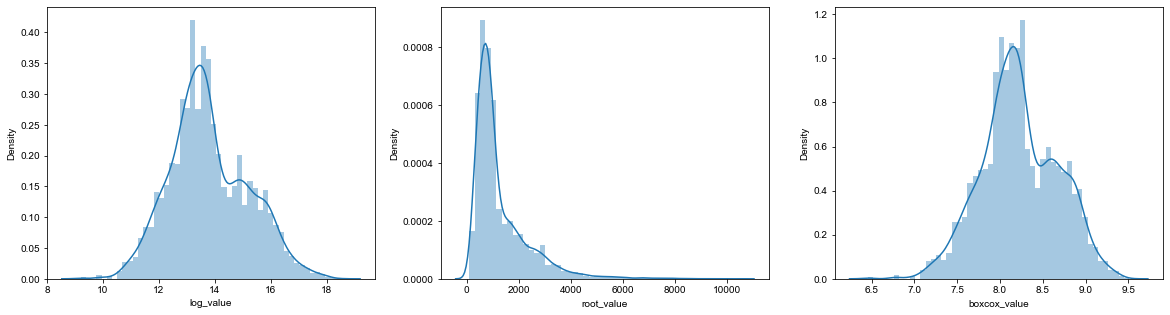

In [259]:
# 그래프 확인
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

sns.distplot(train['log_value'], ax=ax[0])
sns.distplot(train['root_value'], ax=ax[1])
sns.distplot(train['boxcox_value'], ax=ax[2])

In [260]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
 12  value_won         8932 non-null   int64  
 13  log_value         8932 non-null   float64
 14  root_value        8932 non-null   float64
 15  boxcox_value      8932 non-null   float64
dtypes: float64(6), int64(5), object(5)
memory 

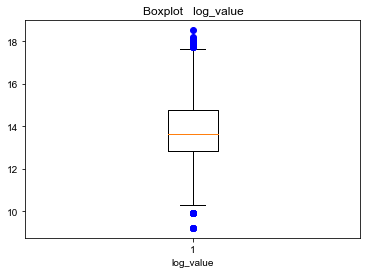

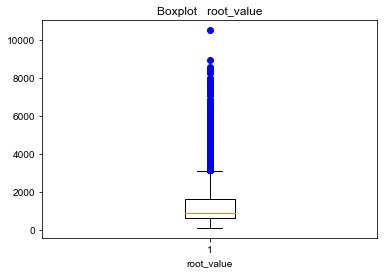

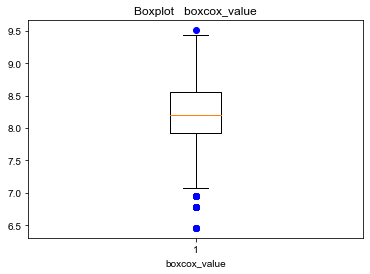

In [261]:
novarplot('log_value')
novarplot('root_value')
novarplot('boxcox_value')

In [176]:
print("log 변환     >> 평균 : {:.4f} 편차 : {:.4f}  최소값 : {:.4f}  최대값 : {:.4f} ".format(np.mean(train['log_value']), np.std(train['log_value']), np.min(train['log_value']), np.max(train['log_value'])))
print("root 변환    >> 평균 : {:.2f} 편차 : {:.2f}  최소값 : {:.2f}  최대값 : {:.2f} ".format(np.mean(train['root_value']), np.std(train['root_value']), np.min(train['root_value']), np.max(train['root_value'])))
print("box-cox 변환 >> 평균 : {:.4f} 편차 : {:.4f}  최소값 : {:.4f}  최대값 : {:.4f} ".format(np.mean(train['boxcox_value']), np.std(train['boxcox_value']), np.min(train['boxcox_value']), np.max(train['boxcox_value'])))


log 변환     >> 평균 : 13.7939 편차 : 1.4016  최소값 : 9.2103  최대값 : 18.5205 
root 변환    >> 평균 : 1282.28 편차 : 1065.10  최소값 : 100.00  최대값 : 10511.90 
box-cox 변환 >> 평균 : 8.2240 편차 : 0.4469  최소값 : 6.4589  최대값 : 9.5096 


In [262]:
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,value_won,log_value,root_value,boxcox_value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0,143611325000,18.520526,10511.898021,9.509606
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0,93574800000,18.092177,8485.281374,9.414518
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0,103972000000,18.197537,8944.271910,9.438218
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0,66282150000,17.747336,7141.428429,9.335496
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0,88376200000,18.035018,8246.211251,9.401574


In [264]:
# # object Unique
#  continent : 선수들의 국적이 포함되어 있는 대륙입니다(object)
 
#  contract_until : 선수의 계약기간이 언제까지인지 나타내어 줍니다(object)
 
#  position : 선수가 선호하는 포지션입니다. ex) 공격수, 수비수 등(object)
 
#  prefer_foot : 선수가 선호하는 발입니다. ex) 오른발(object)

In [265]:
objCol = train.dtypes[train.dtypes=="object"].index
objCol = list(objCol)

In [266]:
objCol.remove('name')

In [267]:
objCol

['continent', 'contract_until', 'position', 'prefer_foot']

In [268]:
for x in objCol:
    print("변수 : ", x, train[x].unique(), end="\n")
    print(" >>>> 항목 개수 : ", len(train[x].unique()))

변수 :  continent ['south america' 'europe' 'africa' 'asia' 'oceania']
 >>>> 항목 개수 :  5
변수 :  contract_until ['2021' '2020' '2019' '2023' '2022' '2024' 'Jun 30, 2019' '2026'
 'Dec 31, 2018' '2018' '2025' 'Jun 30, 2020' 'May 31, 2020' 'May 31, 2019'
 'Jan 31, 2019' 'Jan 1, 2019' 'Jan 12, 2019']
 >>>> 항목 개수 :  17
변수 :  position ['ST' 'GK' 'DF' 'MF']
 >>>> 항목 개수 :  4
변수 :  prefer_foot ['left' 'right']
 >>>> 항목 개수 :  2


In [269]:
train['contract_until']=train['contract_until'].map(lambda x: x[-4:])

In [270]:
train['contract_until'].unique()

array(['2021', '2020', '2019', '2023', '2022', '2024', '2026', '2018',
       '2025'], dtype=object)

In [271]:
numCol.append('log_value')
numCol.append('boxcox_value')

In [272]:
numCol

['age',
 'reputation',
 'stat_overall',
 'stat_potential',
 'stat_skill_moves',
 'value',
 'log_value',
 'boxcox_value']

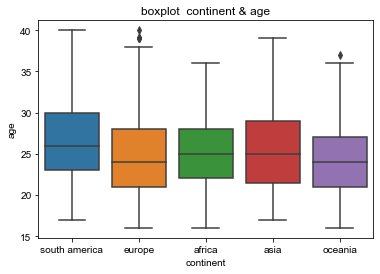

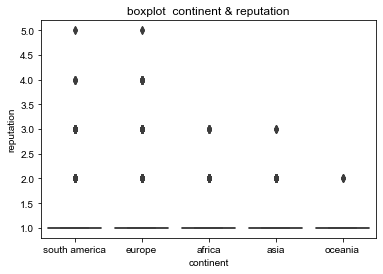

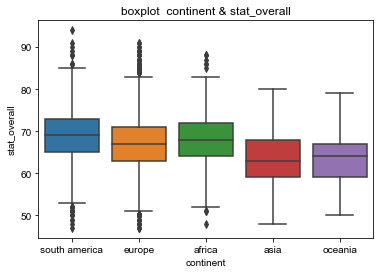

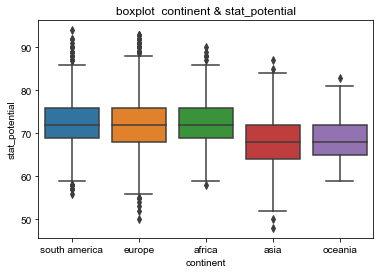

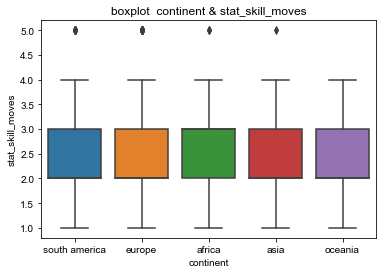

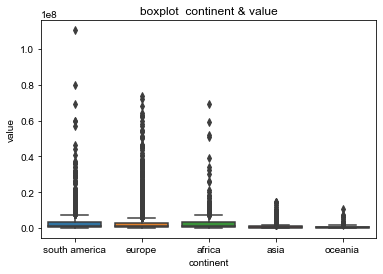

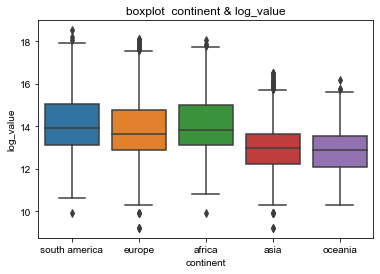

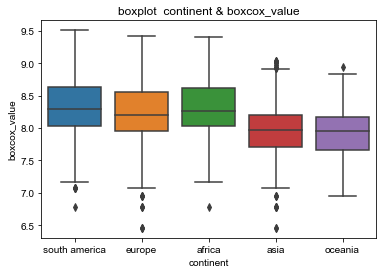

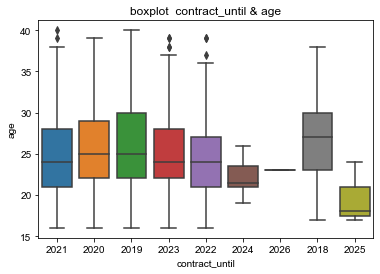

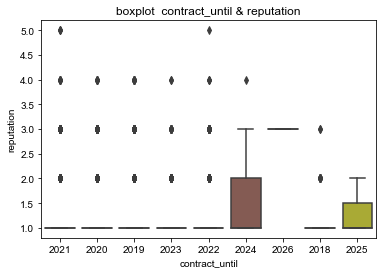

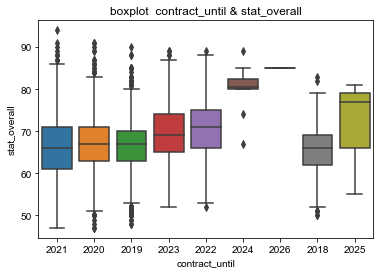

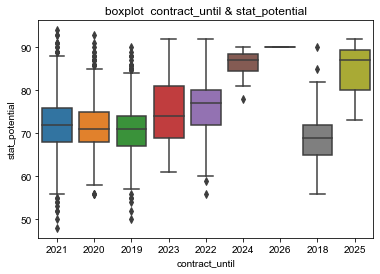

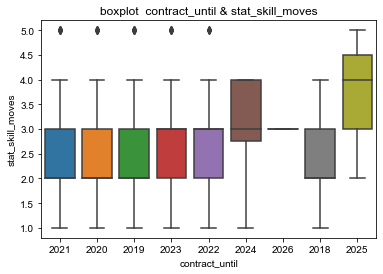

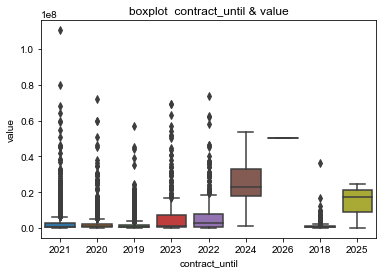

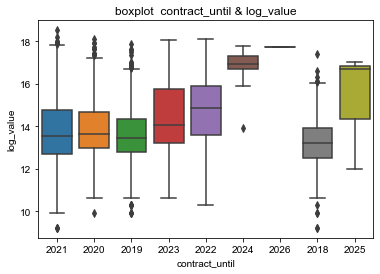

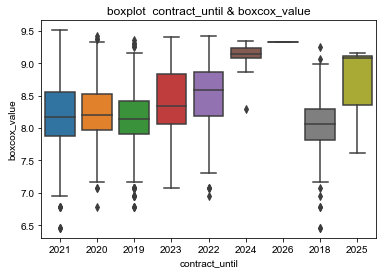

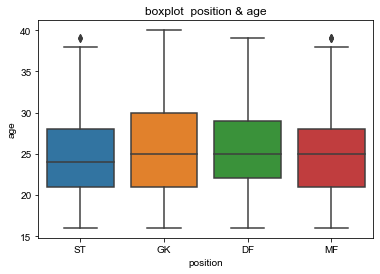

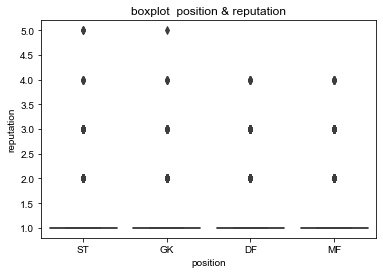

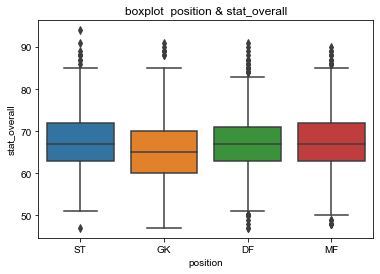

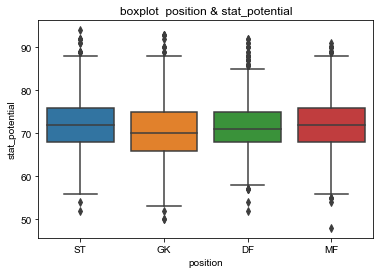

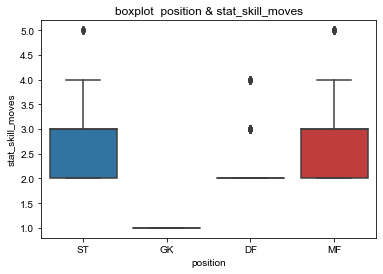

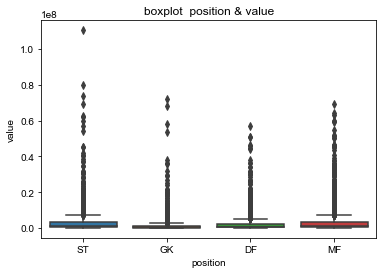

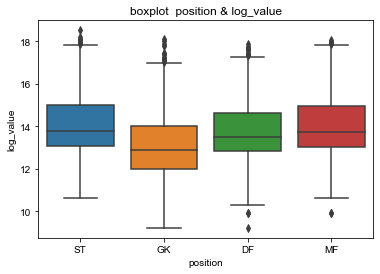

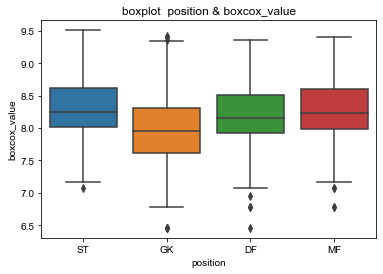

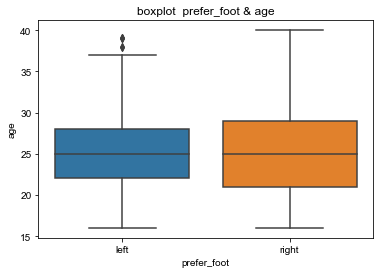

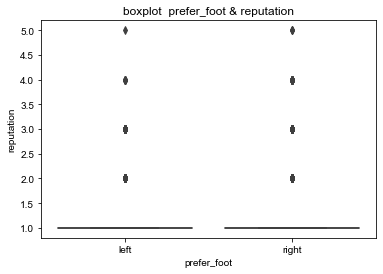

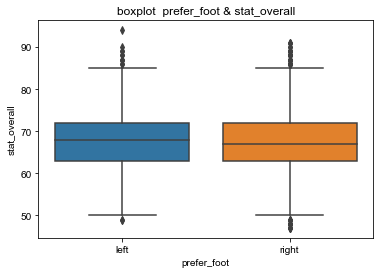

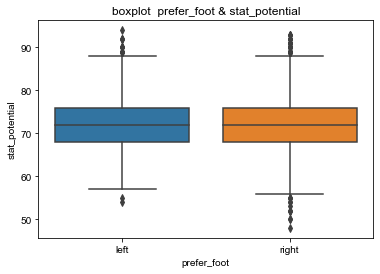

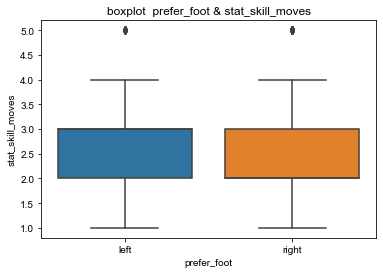

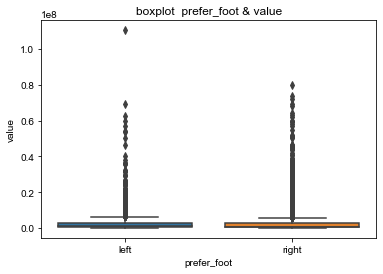

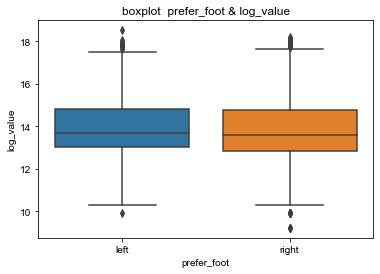

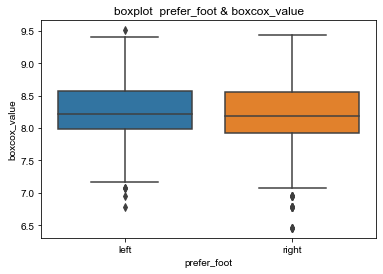

In [273]:
#Object변수와 Num변수 함께 boxplot 그리기

for obj in objCol:
    for num in numCol:
        sns.boxplot(x=obj,y=num,data=train)
        plt.title("boxplot  "+obj+" & "+num)
        plt.xlabel(obj)
        plt.ylabel(num)
        plt.show()


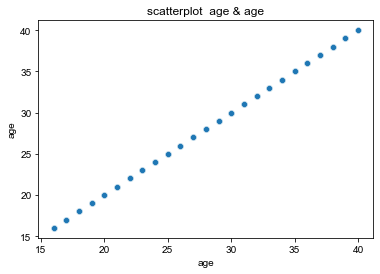

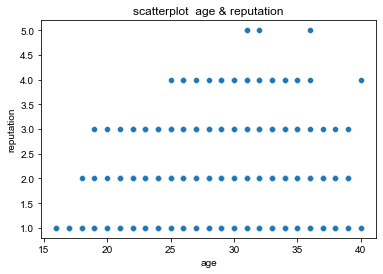

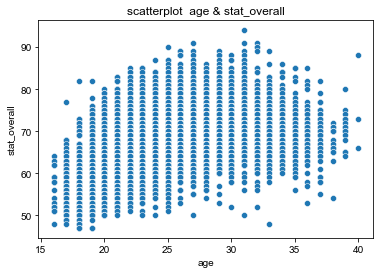

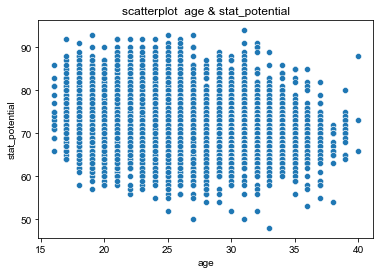

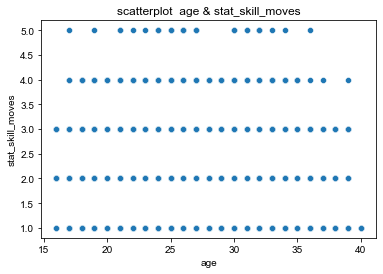

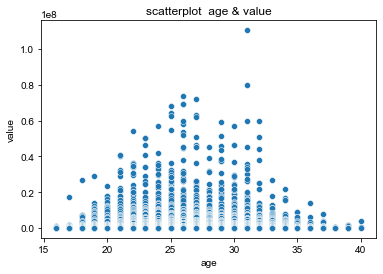

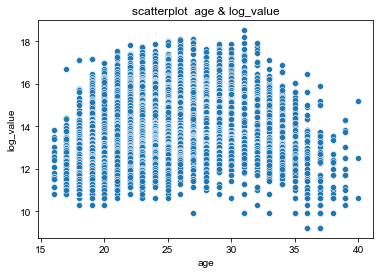

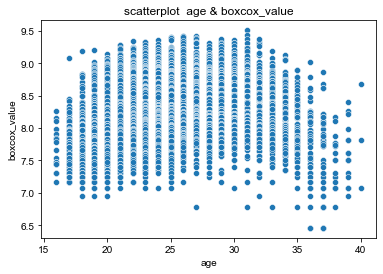

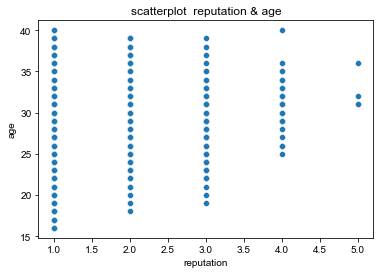

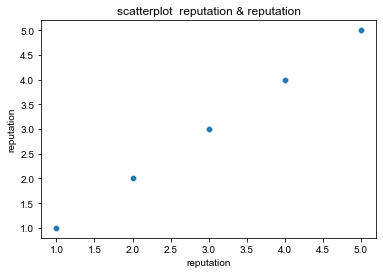

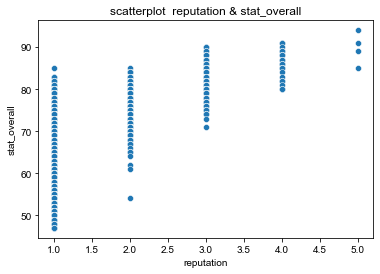

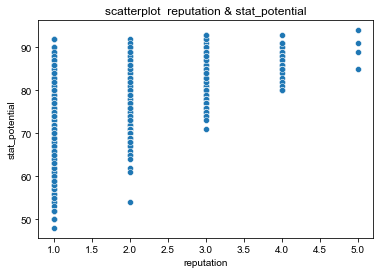

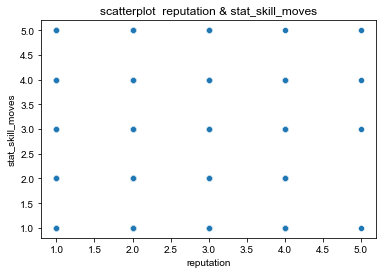

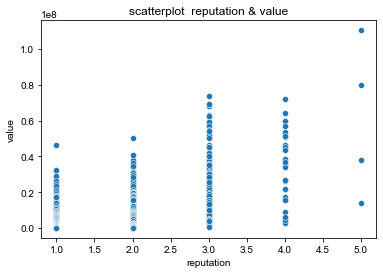

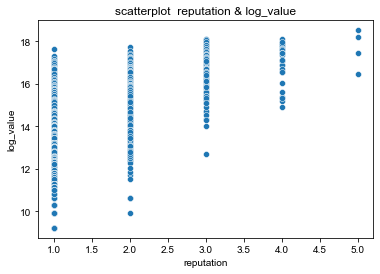

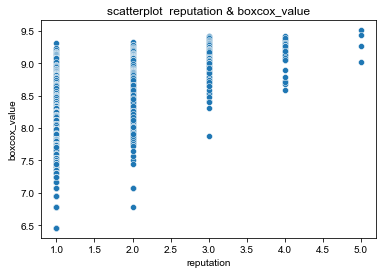

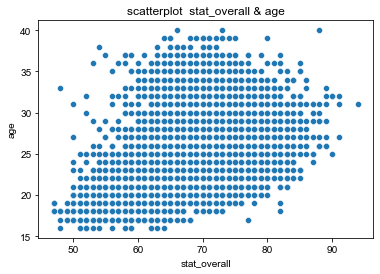

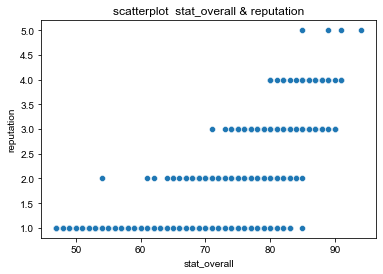

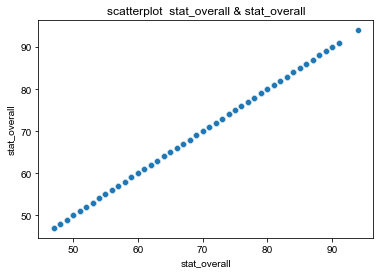

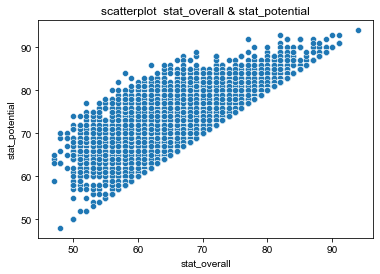

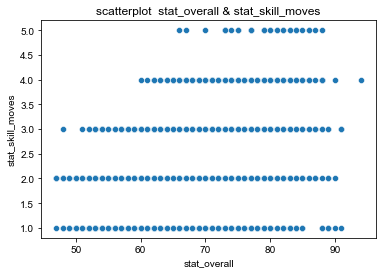

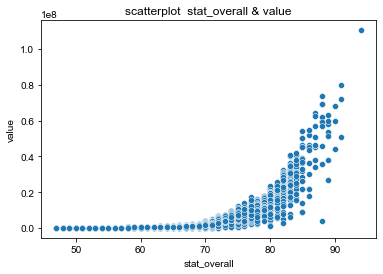

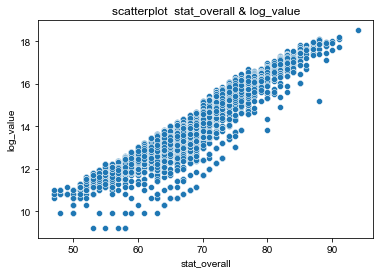

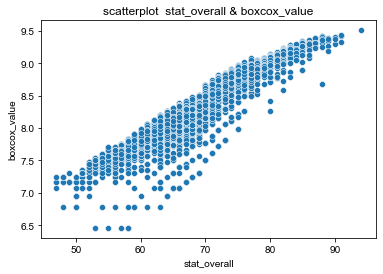

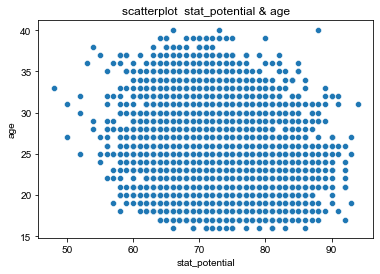

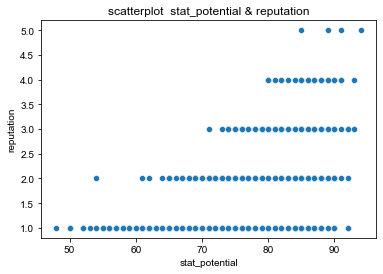

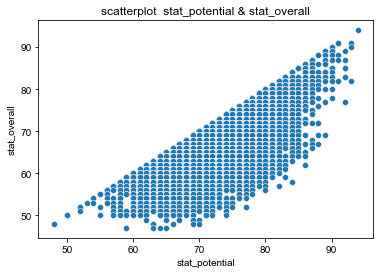

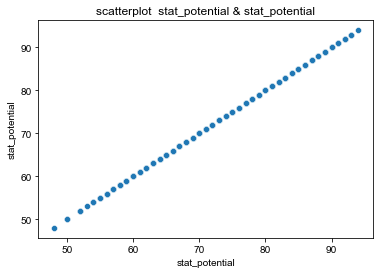

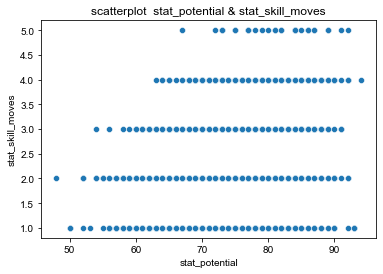

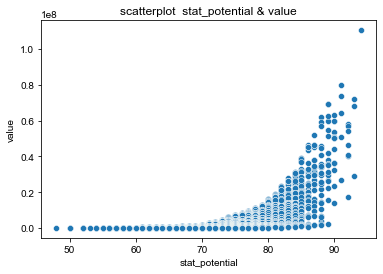

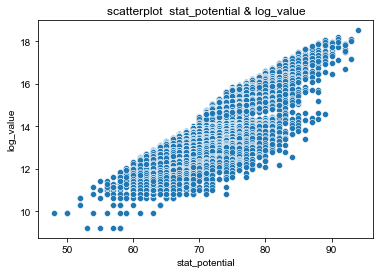

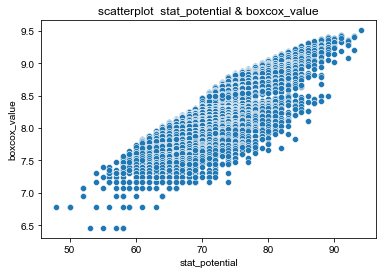

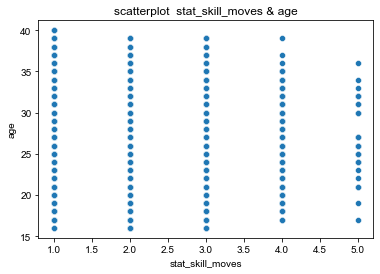

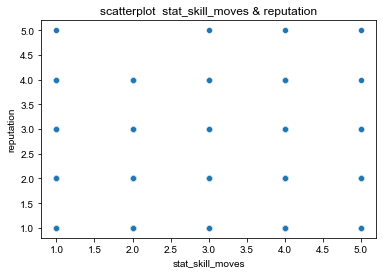

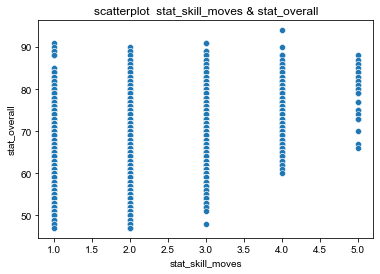

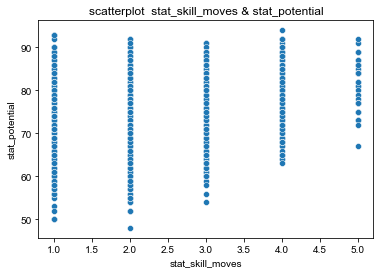

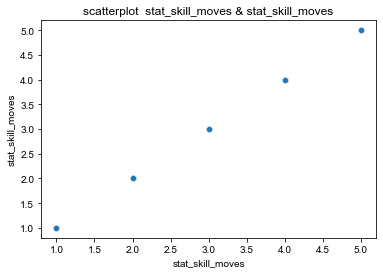

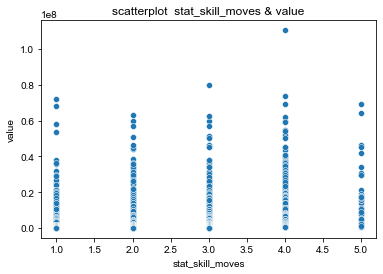

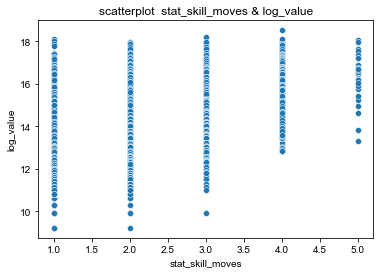

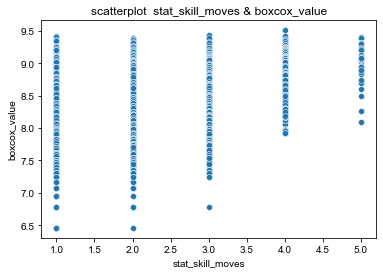

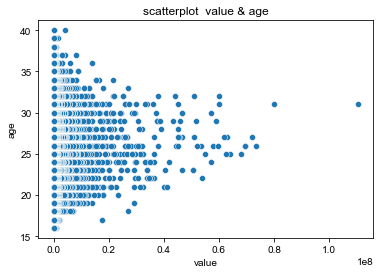

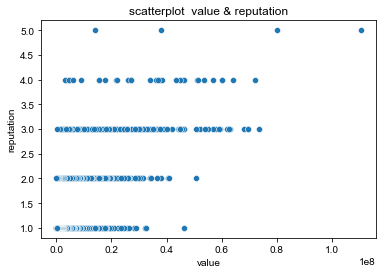

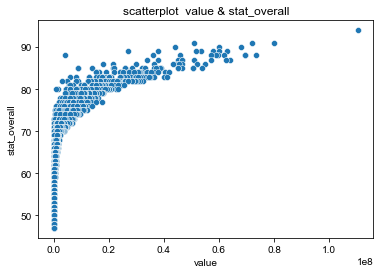

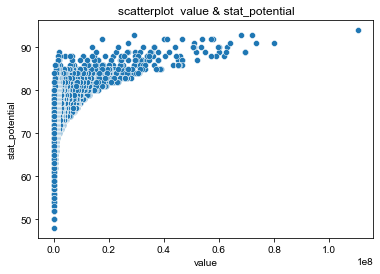

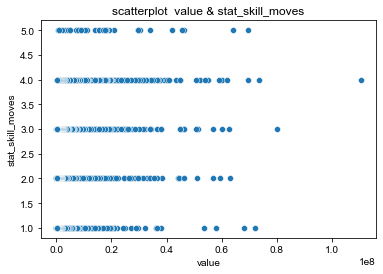

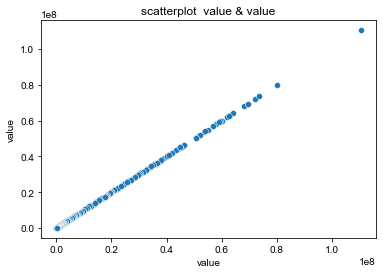

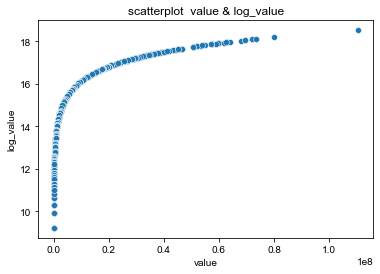

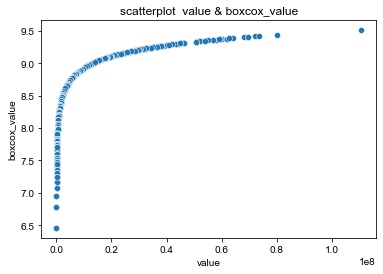

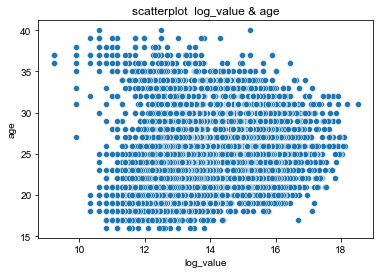

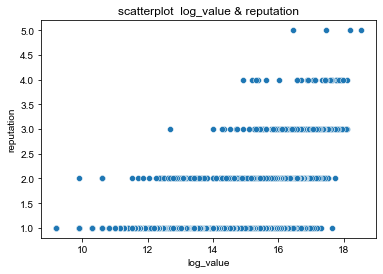

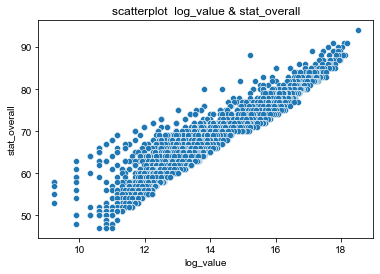

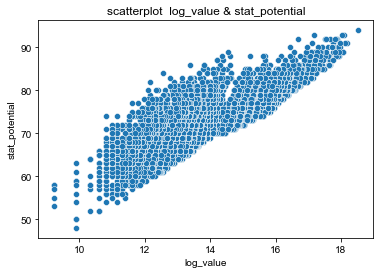

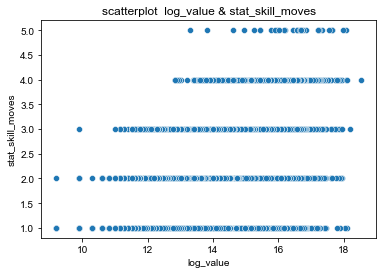

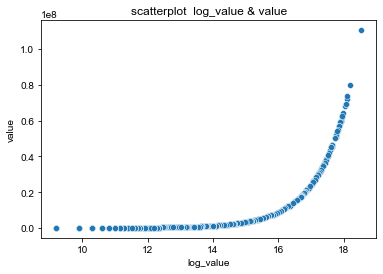

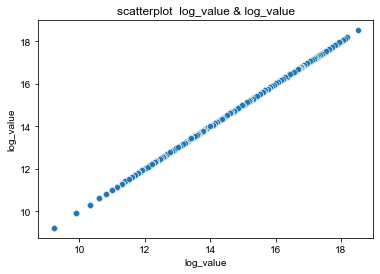

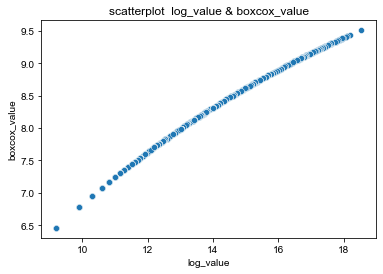

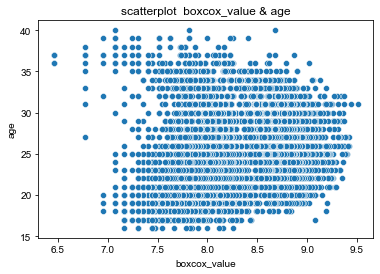

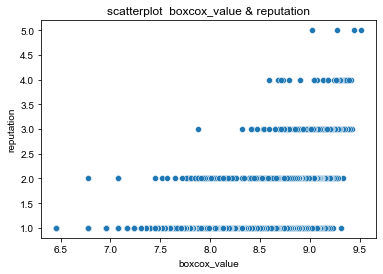

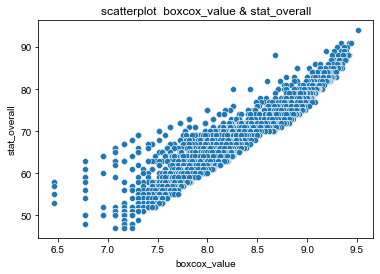

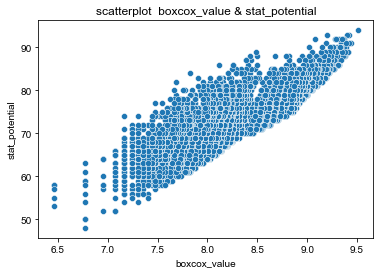

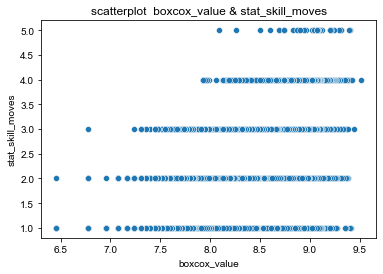

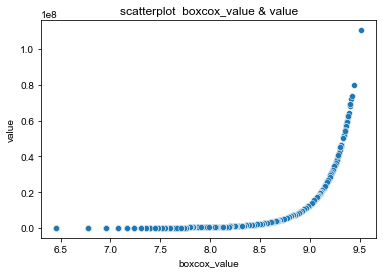

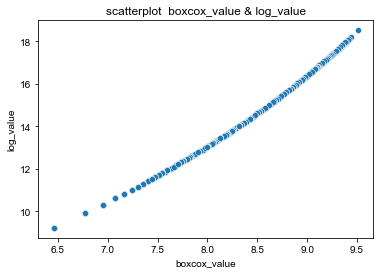

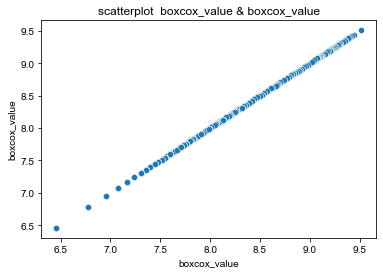

In [274]:
for a in numCol:
    for b in numCol:
        sns.scatterplot(x=a,y=b,data=train)
        plt.title("scatterplot  "+a+" & "+b)
        plt.xlabel(a)
        plt.ylabel(b)
        plt.show()
            

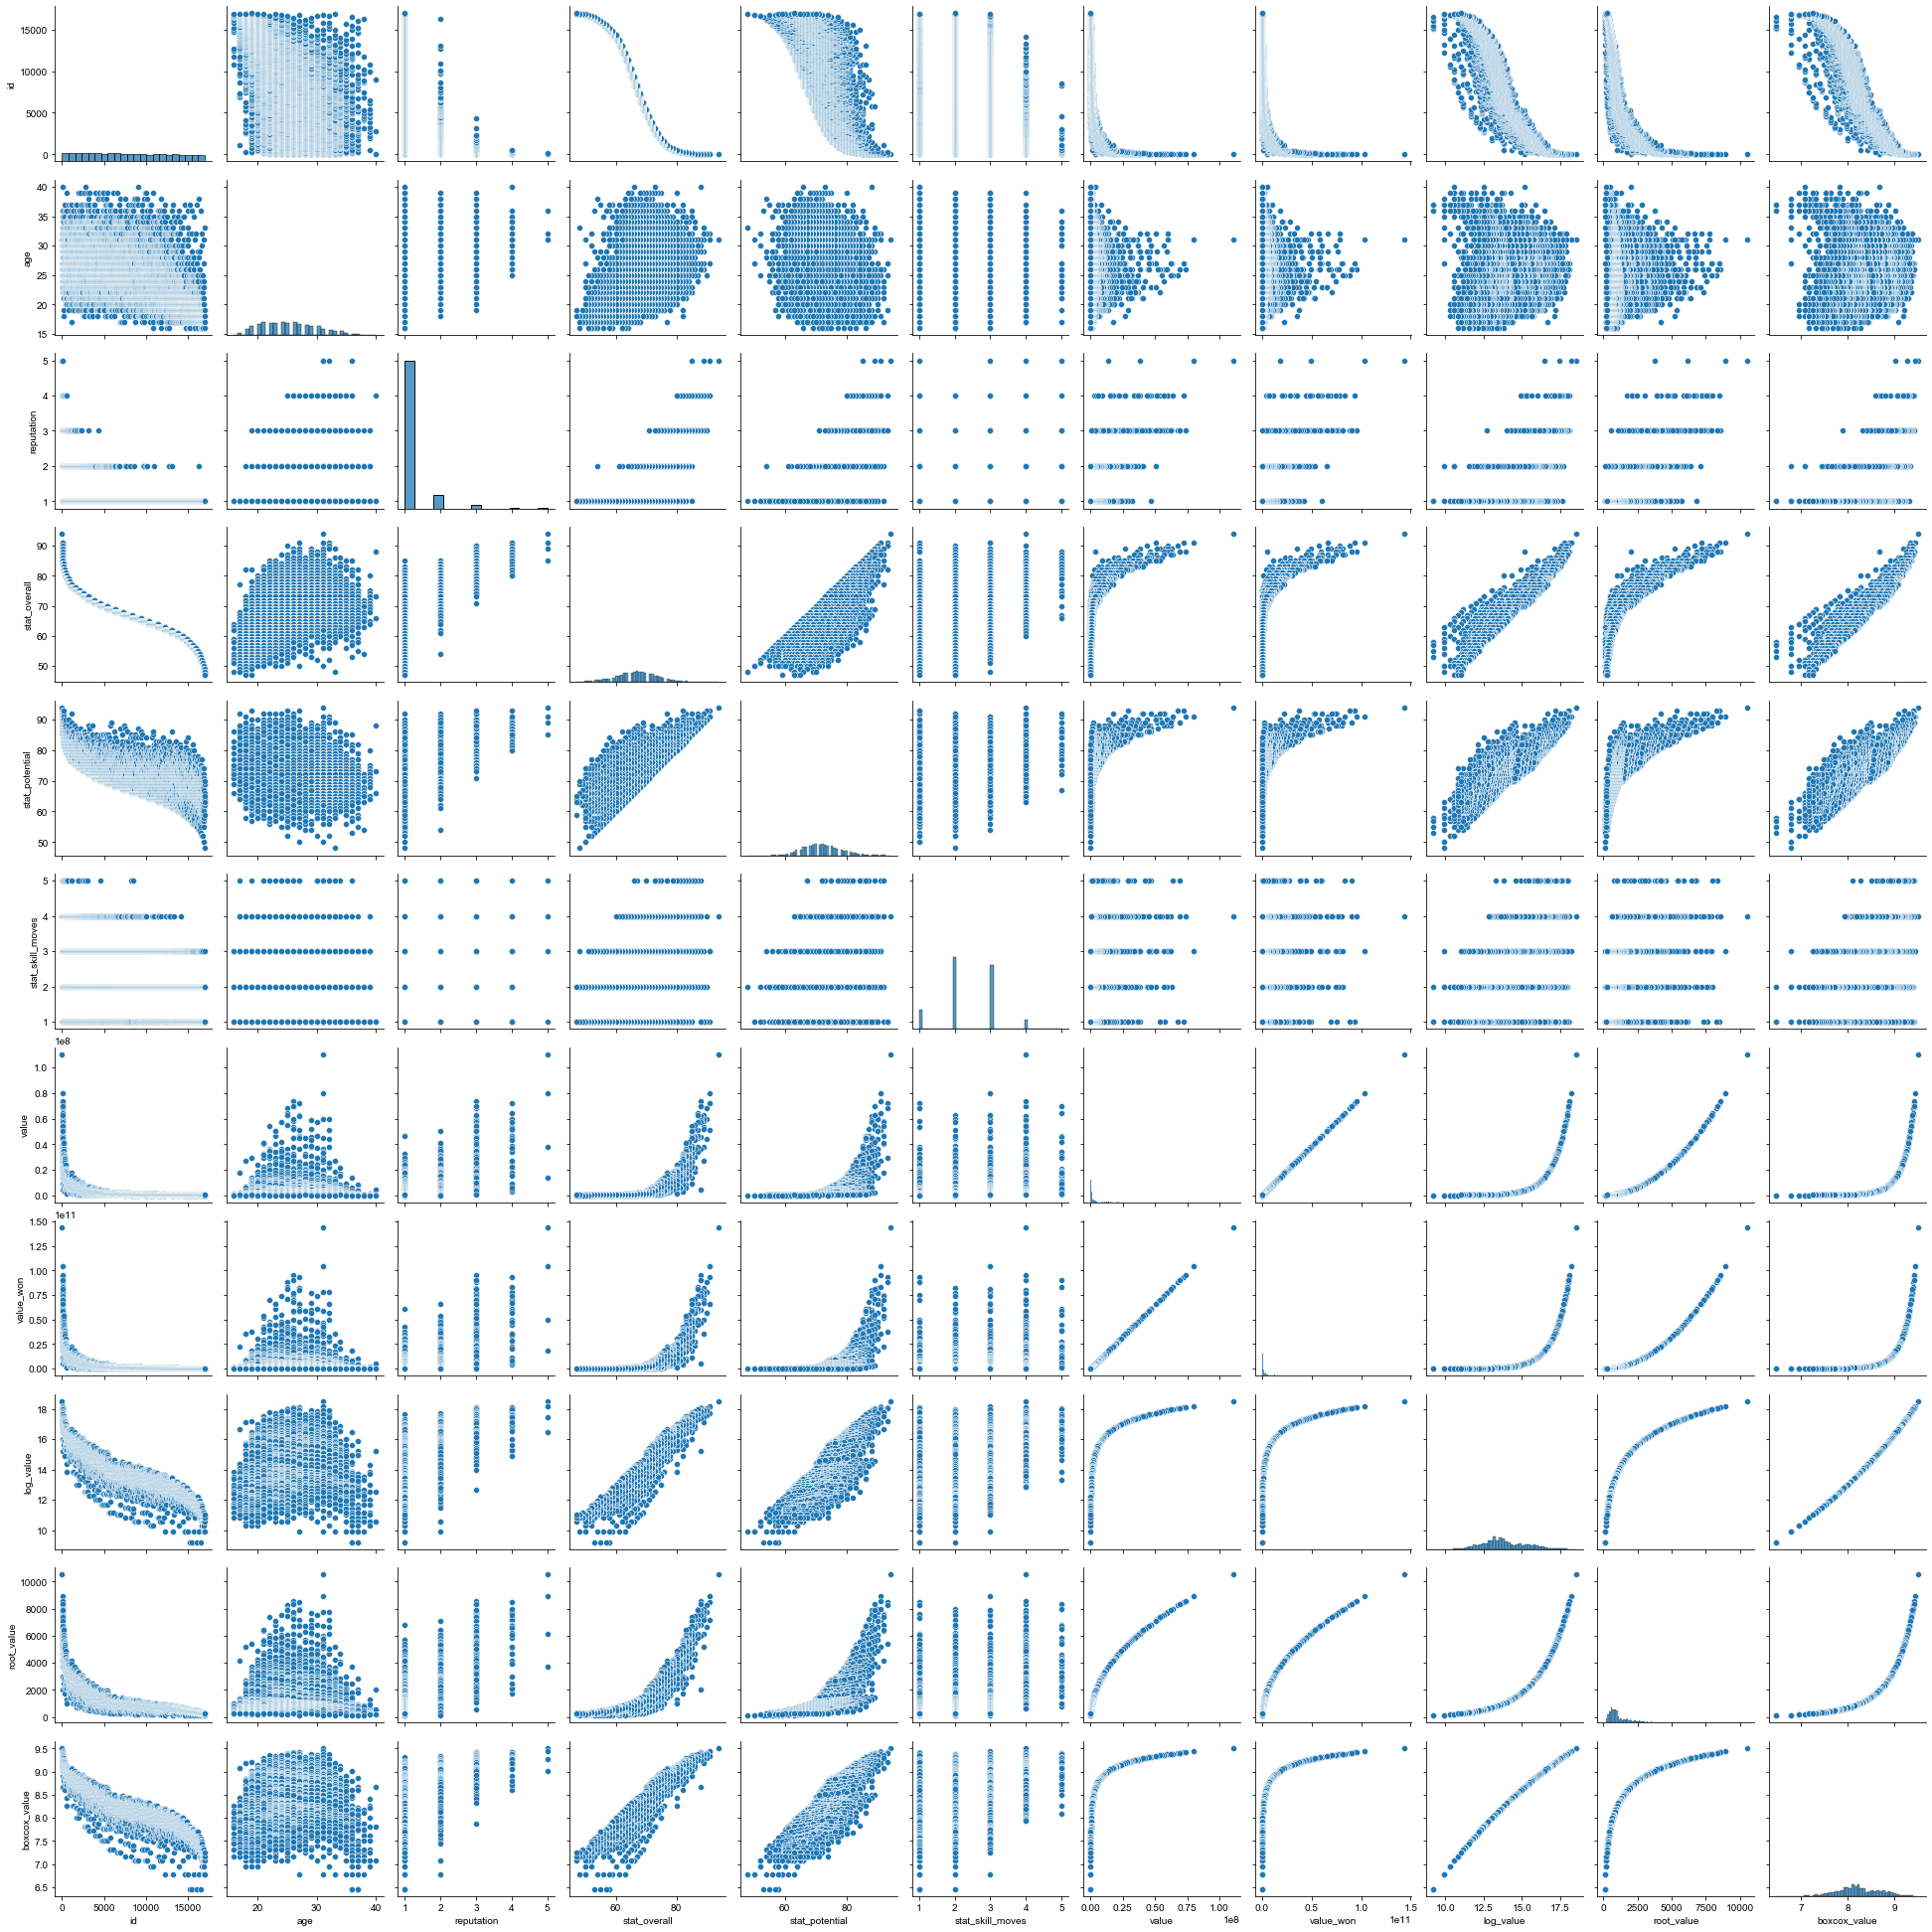

In [275]:
sns.pairplot(train)
plt.show()

In [276]:
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,value_won,log_value,root_value,boxcox_value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0,143611325000,18.520526,10511.898021,9.509606
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0,93574800000,18.092177,8485.281374,9.414518
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0,103972000000,18.197537,8944.271910,9.438218
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0,66282150000,17.747336,7141.428429,9.335496
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0,88376200000,18.035018,8246.211251,9.401574


In [284]:
x_data = train.iloc[:,2:11]

In [285]:
y_data = train['value']
y_data_log = train['log_value']
y_data_boxcox = train['boxcox_value']

In [286]:
x_data.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,31,south america,2021,ST,left,5.0,94,94,4.0
1,27,europe,2020,GK,right,4.0,91,93,1.0
2,31,south america,2021,ST,right,5.0,91,91,3.0
3,32,europe,2020,DF,right,4.0,91,91,3.0
4,25,europe,2021,GK,right,3.0,90,93,1.0


In [287]:
x_data = pd.get_dummies(x_data)

In [288]:
x_data.head()

,age,reputation,stat_overall,stat_potential,stat_skill_moves,continent_africa,continent_asia,continent_europe,continent_oceania,continent_south america,...,contract_until_2023,contract_until_2024,contract_until_2025,contract_until_2026,position_DF,position_GK,position_MF,position_ST,prefer_foot_left,prefer_foot_right
0,31,5.0,94,94,4.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
1,27,4.0,91,93,1.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,31,5.0,91,91,3.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,32,4.0,91,91,3.0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,25,3.0,90,93,1.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [289]:
#100점 만점 변수 5점 변수로 변환
x_data['stat_overall']=x_data['stat_overall']/100*5
x_data['stat_potential']=x_data['stat_potential']/100*5

In [290]:
x_data.head()

,age,reputation,stat_overall,stat_potential,stat_skill_moves,continent_africa,continent_asia,continent_europe,continent_oceania,continent_south america,...,contract_until_2023,contract_until_2024,contract_until_2025,contract_until_2026,position_DF,position_GK,position_MF,position_ST,prefer_foot_left,prefer_foot_right
0,31,5.0,4.70,4.70,4.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
1,27,4.0,4.55,4.65,1.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,31,5.0,4.55,4.55,3.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,32,4.0,4.55,4.55,3.0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,25,3.0,4.50,4.65,1.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [297]:
x_data['age_minmax'] = (x_data['age']-x_data['age'].min())/(x_data['age'].max()-x_data['age'].min())
x_data['age_std'] = (x_data['age']-x_data['age'].mean())/x_data['age'].std()

In [298]:
x_data.head()

,age,reputation,stat_overall,stat_potential,stat_skill_moves,continent_africa,continent_asia,continent_europe,continent_oceania,continent_south america,...,contract_until_2025,contract_until_2026,position_DF,position_GK,position_MF,position_ST,prefer_foot_left,prefer_foot_right,age_minmax,age_std
0,31,5.0,4.70,4.70,4.0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0.625000,1.249239
1,27,4.0,4.55,4.65,1.0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0.458333,0.386336
2,31,5.0,4.55,4.55,3.0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0.625000,1.249239
3,32,4.0,4.55,4.55,3.0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0.666667,1.464964
4,25,3.0,4.50,4.65,1.0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0.375000,-0.045116


In [ ]:
- linear regression
1) age를 그냥 넣어서 y_data/y_data_log/y_data_boxcox 
2) age_minmax 넣어서 y_data/y_data_log/y_data_boxcoxc
3) age_std 넣어서 y_data/y_data_log/y_data_boxcox

In [ ]:
- random forest
1) age를 그냥 넣어서 y_data/y_data_log/y_data_boxcox 
2) age_minmax 넣어서 y_data/y_data_log/y_data_boxcox
3) age_std 넣어서 y_data/y_data_log/y_data_boxcox

In [ ]:
-xgboost
1) age를 그냥 넣어서 y_data/y_data_log/y_data_boxcox 
2) age_minmax 넣어서 y_data/y_data_log/y_data_boxcox
3) age_std 넣어서 y_data/y_data_log/y_data_boxcox